In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('sales_data.csv')

## Data Cleaning

In [4]:
df.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


### Feature Reduction

In [5]:
# remove id columns 
df = df.drop(columns=['Order ID', 'Product_ean'])

In [6]:
# anaylze breakdown of 'catégorie' feature for a random product
df[df['Product'] == 'Macbook Pro Laptop'].groupby(['catégorie']).count()

,Order Date,Product,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
catégorie,,,,,,,,
Alimentation,1173,1173,1173,1173,1173,1173,1173,1173
Sports,1197,1197,1197,1197,1197,1197,1197,1197
Vêtements,1136,1136,1136,1136,1136,1136,1136,1136
Électronique,1218,1218,1218,1218,1218,1218,1218,1218


The feature 'catégorie' classfies the same product in the nearly equally in four differnet ways: Alimentation, Sports, Vêtements (Clothing), and Électronique. The categorization of a computer as alimentation, clothing, or sports is clearly inaccurate. This feature will be removed. 

### Check for Missing Values 

In [7]:
#check for missing values in the entire dataframe
df.isnull().sum()

Order Date          0
Product             0
catégorie           0
Purchase Address    0
Quantity Ordered    0
Price Each          0
Cost price          0
turnover            0
margin              0
dtype: int64

### Reformat Data types

In [8]:
# check data types
df.dtypes

Order Date           object
Product              object
catégorie            object
Purchase Address     object
Quantity Ordered      int64
Price Each          float64
Cost price          float64
turnover            float64
margin              float64
dtype: object

In [9]:
# Covert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [10]:
df.dtypes

Order Date          datetime64[ns]
Product                     object
catégorie                   object
Purchase Address            object
Quantity Ordered             int64
Price Each                 float64
Cost price                 float64
turnover                   float64
margin                     float64
dtype: object

## Exploratory Analysis

In [11]:
# Compare the number of items sold by product
items_sold = df['Product'].groupby(df['Product']).count().sort_values()

In [12]:
items_sold

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2065
20in Monitor                   4101
ThinkPad Laptop                4128
Macbook Pro Laptop             4724
Flatscreen TV                  4800
Google Phone                   5525
34in Ultrawide Monitor         6181
27in 4K Gaming Monitor         6230
iPhone                         6842
27in FHD Monitor               7507
Bose SoundSport Headphones    13325
Apple Airpods Headphones      15549
Wired Headphones              18882
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Lightning Charging Cable      21658
USB-C Charging Cable          21903
Name: Product, dtype: int64

Text(0.5, 1.0, 'Number of items sold')

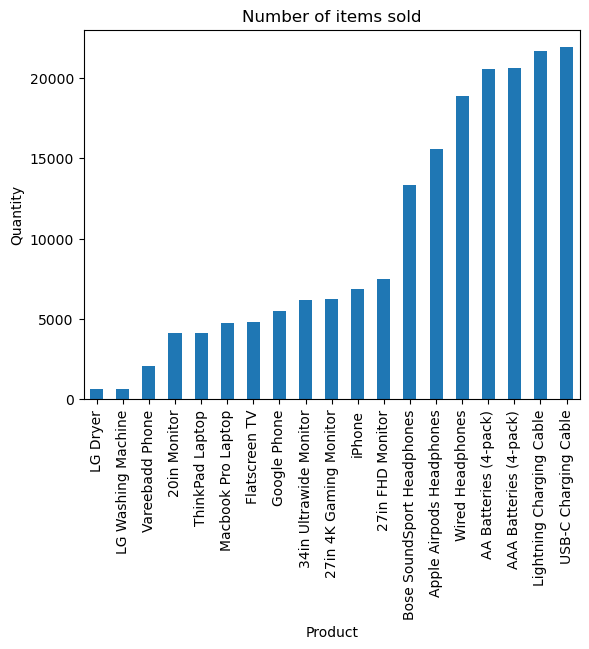

In [13]:
items_sold.plot(kind='bar')
plt.ylabel('Quantity')
plt.title('Number of items sold')

The graph above contains a distribution of the amount of times each product has been sold. 

In [14]:
# Compare the revenue generated by product
sum_sold = df['margin'].groupby(df['Product']).sum().sort_values()

In [15]:
sum_sold

Product
AAA Batteries (4-pack)        4.637042e+04
AA Batteries (4-pack)         5.305920e+04
Wired Headphones              1.232392e+05
USB-C Charging Cable          1.432506e+05
20in Monitor                  1.589520e+05
Lightning Charging Cable      1.735471e+05
LG Dryer                      2.596920e+05
LG Washing Machine            2.677320e+05
27in FHD Monitor              3.963486e+05
Vareebadd Phone               5.542240e+05
Bose SoundSport Headphones    6.727827e+05
Apple Airpods Headphones      8.222025e+05
Flatscreen TV                 9.686190e+05
34in Ultrawide Monitor        1.578224e+06
27in 4K Gaming Monitor        1.631515e+06
Google Phone                  2.223864e+06
ThinkPad Laptop               2.767072e+06
iPhone                        3.212181e+06
Macbook Pro Laptop            5.385192e+06
Name: margin, dtype: float64

Text(0.5, 1.0, 'Total of items sold')

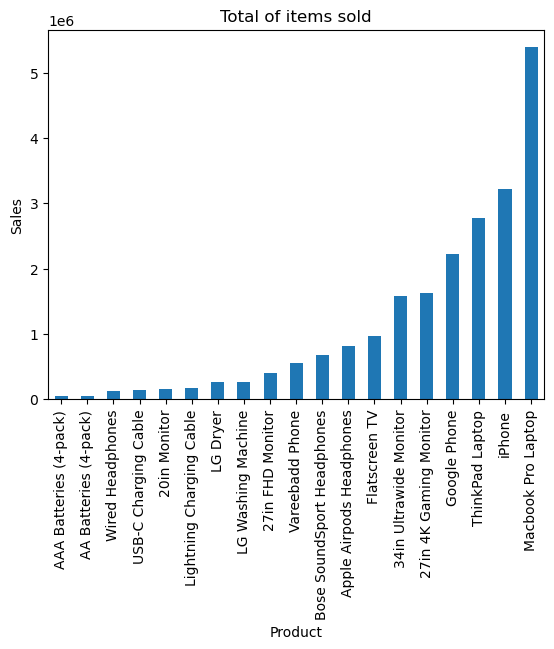

In [16]:
sum_sold.plot(kind='bar')
plt.ylabel('Sales')
plt.title('Total of items sold')

The graph above contains the distribution of total margin aggregated and group by each product. The higher priced items are towards the top of the chart while the lower priced items are on the lower end. 

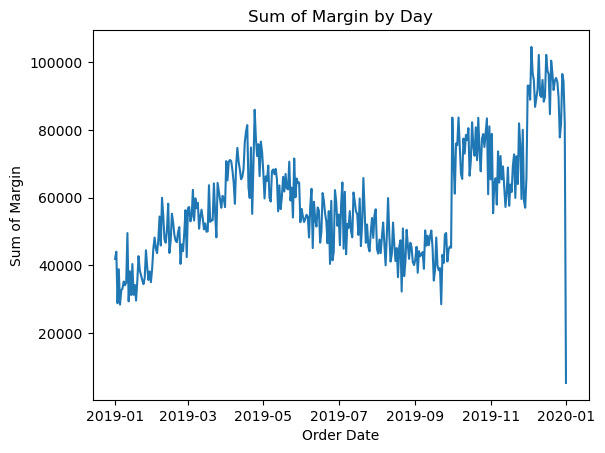

In [17]:
# calcuate the profit margins generate by date
daily_margin = df.groupby(df['Order Date'].dt.date)['margin'].sum().reset_index()

plt.plot(daily_margin['Order Date'], daily_margin['margin'])

# Adding labels and title to the graph
plt.xlabel('Order Date')
plt.ylabel('Sum of Margin')
plt.title('Sum of Margin by Day')

# Displaying the graph
plt.show()

This plot shows the trend of margin by day over the course of time.There are periods of time where sales rise and decline. Since the data ends on January 2020, there is a drop in margin. 

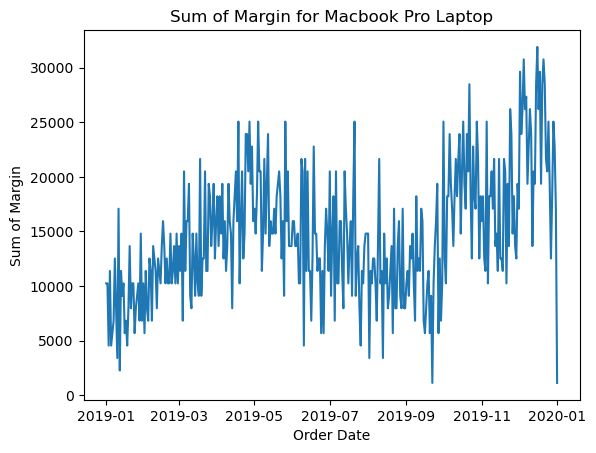

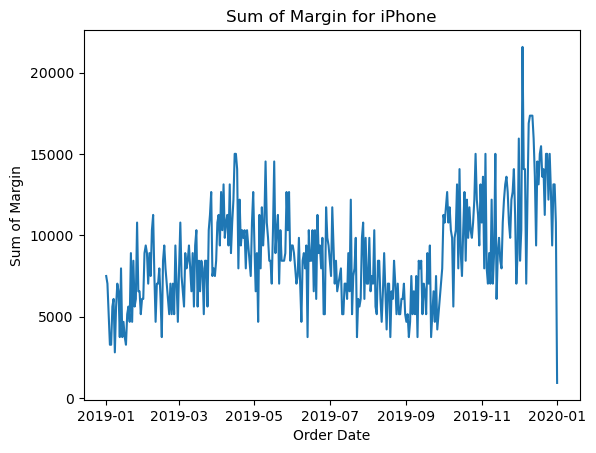

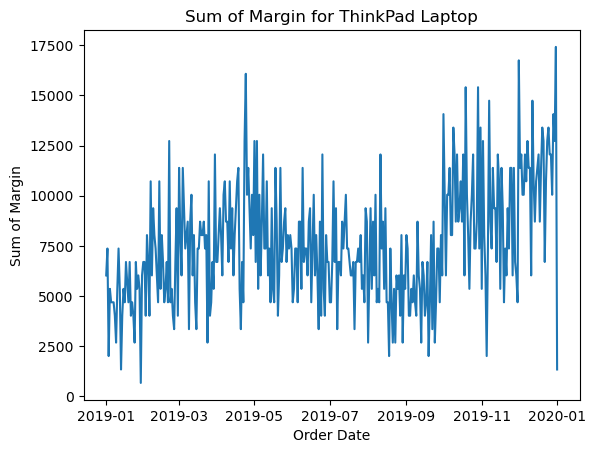

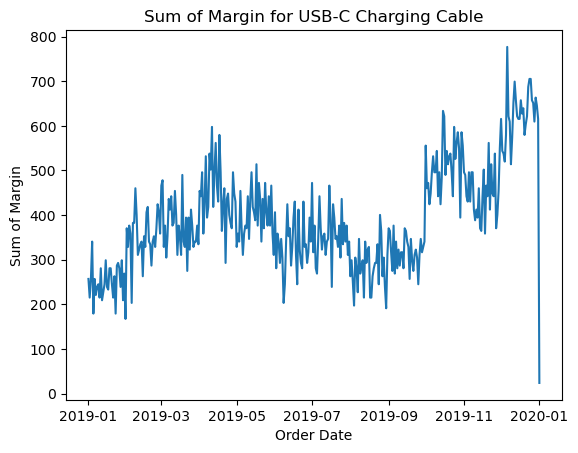

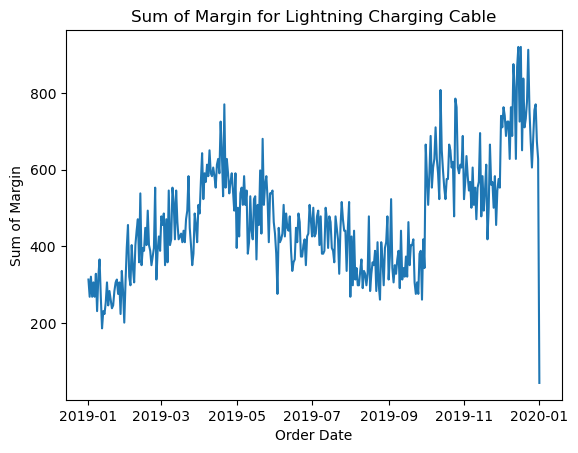

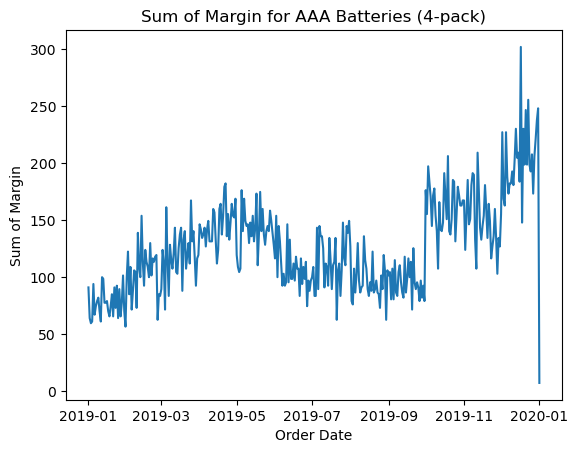

In [18]:
# List of top three products from margins and item sold
top_three_margin = ["Macbook Pro Laptop", "iPhone", "ThinkPad Laptop", "USB-C Charging Cable", "Lightning Charging Cable", "AAA Batteries (4-pack)"]

# Grouping the data by product and day, and calculating the sum of the 'margin' column
product_margin = df.groupby(['Product', df['Order Date'].dt.date])['margin'].sum().reset_index()

# Creating a graph for each product
for product in top_three_margin:
    product_data = product_margin[product_margin['Product'] == product]
    plt.plot(product_data['Order Date'], product_data['margin'])
    plt.xlabel('Order Date')
    plt.ylabel('Sum of Margin')
    plt.title(f'Sum of Margin for {product}')
    plt.show()

The graphs above display the top three items margin over time and the top three of total items sold. All the items follow the same trend as the analysis that was conduted but on a smaller scale, especially those with the lower margin.

## Explore the Target Feature, Profit Margin

In [19]:
df['margin'].describe()

count    185950.000000
mean        115.289422
std         225.227190
min           1.495000
25%           5.975000
50%           7.475000
75%          52.500000
max        2278.000000
Name: margin, dtype: float64

### Check the Distribution of the Target Feature

Text(0, 0.5, 'Count')

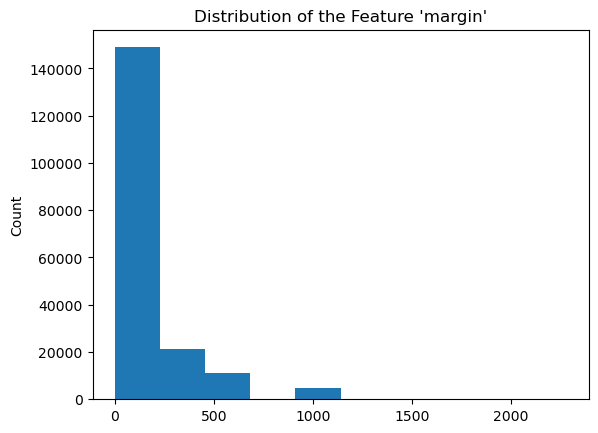

In [20]:
#plot the distribution of the target variable 
plt.hist(df['margin'])
plt.title("Distribution of the Feature 'margin'")
plt.ylabel("Count")

The histogram of profit margin shows a strong positive skew.

Text(0, 0.5, 'Count')

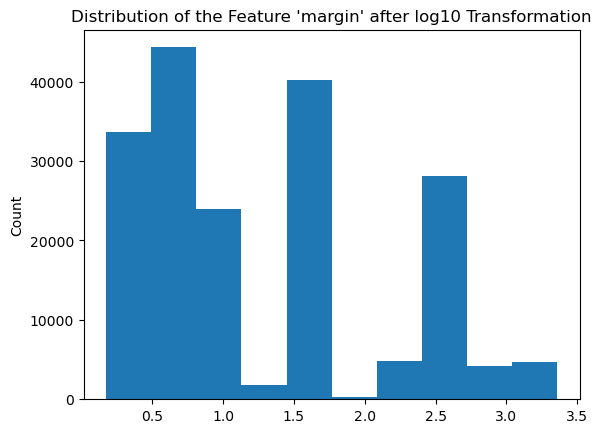

In [21]:
#use a log 10 transformation to correct the positive skew in the feature 'margin'
log_margin = np.log10(df['margin'])

plt.hist(log_margin)
plt.title("Distribution of the Feature 'margin' after log10 Transformation")
plt.ylabel("Count")

When a log 10 transformation is applied to the target variable, a multimodal distribition emerges. It should be evaluated if other transformations can generate a more normal distribution.

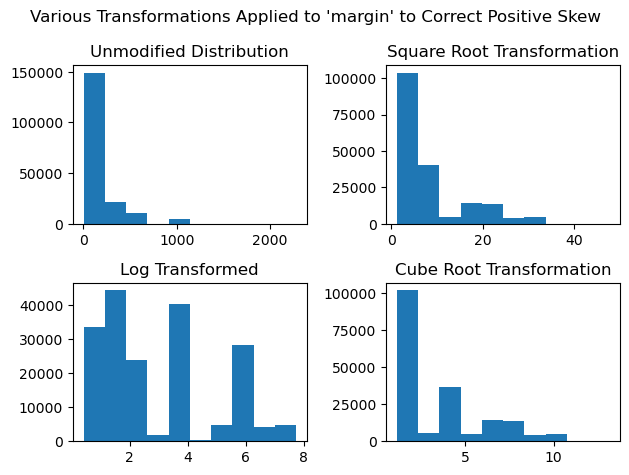

In [22]:
# Compare the effectiveness of various transformations for correcting the positive skew 

fig, axs = plt.subplots(2, 2)
fig.suptitle("Various Transformations Applied to 'margin' to Correct Positive Skew")
axs[0, 0].hist(df['margin'])
axs[0, 0].set_title("Unmodified Distribution")
axs[1, 0].hist(np.log(df['margin']))
axs[1, 0].set_title("Log Transformed")
axs[0, 1].hist(np.sqrt(df['margin']))
axs[0, 1].set_title("Square Root Transformation")
axs[1, 1].hist(np.cbrt(df['margin']))
axs[1, 1].set_title("Cube Root Transformation")
fig.tight_layout()

A log10 transformation is the most effective at correcting the postive skew.

Text(0.5, 1.0, "Distribution of log10 transformed 'Margins' with 6 bins")

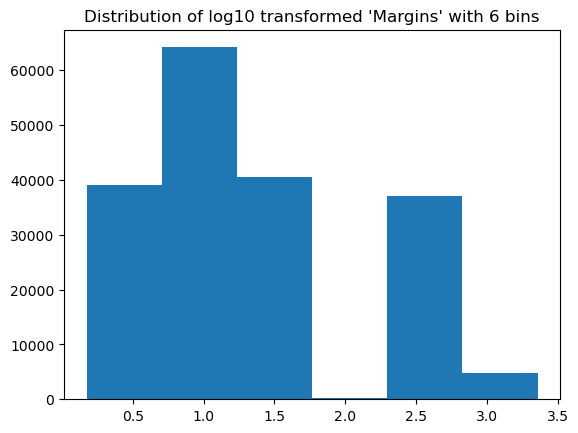

In [23]:
# Bin the data to correct the multimodal distribution 
plt.hist(np.log10(df['margin']), bins=6)
plt.title("Distribution of log10 transformed 'Margins' with 6 bins")

Binning the data into 6 bins reduces the effect of the multimodal distribution and the targer variable more closely approaches a normal distribution. 

In [24]:
# create an object for the binned datas 
margin_binned = pd.qcut(log_margin, q=6)
margin_binned.head()

0    (2.406, 3.358]
1    (0.778, 0.874]
2     (0.874, 1.72]
3     (0.874, 1.72]
4    (0.476, 0.778]
Name: margin, dtype: category
Categories (6, interval[float64, right]): [(0.174, 0.476] < (0.476, 0.778] < (0.778, 0.874] < (0.874, 1.72] < (1.72, 2.406] < (2.406, 3.358]]

### Check for Outliers in the Target Feature

Text(0.5, 1.0, 'Boxplot of Sale Margin')

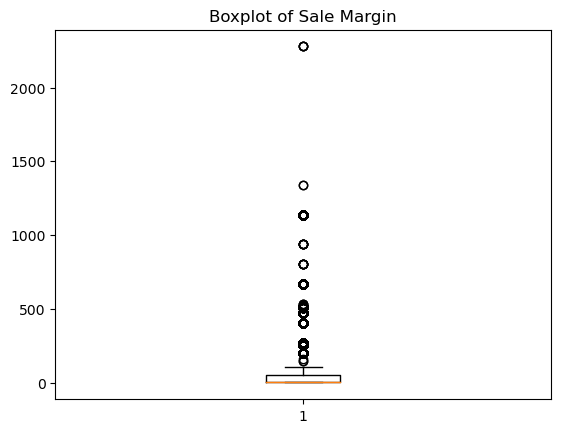

In [25]:
plt.boxplot(df['margin'])
plt.title("Boxplot of Sale Margin")

As expected in a feature with strong positive skew, the boxplot suggests a high number of outliers.

In [26]:
# calculate the upper and lower thresholds for outliers using IQR methodology
upper = np.percentile(df['margin'], 75) + 1.5*stats.iqr(df['margin'])
lower = np.percentile(df['margin'], 25) - 1.5*stats.iqr(df['margin'])

print(upper)
print(lower)

122.2875
-63.81249999999999


The upper threshold for identifying outliers is 122.2875, which is slightly above the mean. This is not surprising based on the strong skew shown in the histogram. The lower threshold is negative. This threshold will be ignored becuase there are no negative values of 'margin'. 

In [27]:
# create a dataframe of the outliers to investigate why there is such a large number of instance that are flagged as outliers 
outliers = df[df['margin']>upper]

outliers.head()

,Order Date,Product,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,iPhone,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
6,2019-01-26 12:16:00,27in 4K Gaming Monitor,Vêtements,"979 Park St, Los Angeles, CA 90001",1,389.99,128.6967,389.99,261.2933
11,2019-01-31 10:12:00,Macbook Pro Laptop,Vêtements,"322 6th St, San Francisco, CA 94016",1,1700.00,561.0000,1700.00,1139.0000
14,2019-01-03 21:54:00,Flatscreen TV,Électronique,"363 Spruce St, Austin, TX 73301",1,300.00,99.0000,300.00,201.0000
16,2019-01-10 11:20:00,Vareebadd Phone,Alimentation,"471 Center St, Los Angeles, CA 90001",1,400.00,132.0000,400.00,268.0000


In [28]:
# count the number of products sold in sales that were flagged as outliers 
outliers_sold = outliers['Product'].groupby(outliers['Product']).count().sort_values(ascending=True)
outliers_sold

Product
Apple Airpods Headphones         1
Bose SoundSport Headphones       2
LG Dryer                       646
LG Washing Machine             666
Vareebadd Phone               2065
ThinkPad Laptop               4128
Macbook Pro Laptop            4724
Flatscreen TV                 4800
Google Phone                  5525
34in Ultrawide Monitor        6181
27in 4K Gaming Monitor        6230
iPhone                        6842
Name: Product, dtype: int64

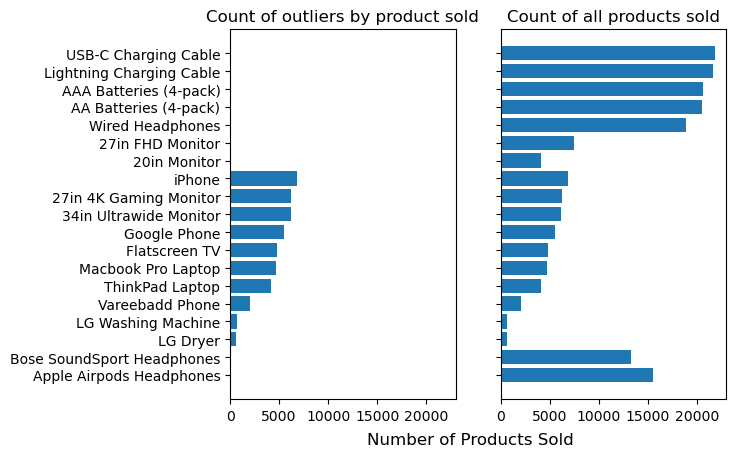

In [29]:
# plot the products that were identified as outliers next to all products sold 
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.supxlabel('Number of Products Sold')

ax1.barh(outliers_sold.index, outliers_sold)
ax1.set_title("Count of outliers by product sold")
ax2.barh(items_sold.index, items_sold)
ax2.set_title("Count of all products sold")

plt.show()

In the bar graph above, it appears that the presence of outliers in item profit margin is associated with the specific product being sold.

In [30]:
# determine if all sales for specific items are considered outliers 
for x in outliers_sold.index: 
    if outliers_sold[x] == items_sold[x]:
        print("True", x)
    else:
        print("False", x)

False Apple Airpods Headphones
False Bose SoundSport Headphones
True LG Dryer
True LG Washing Machine
True Vareebadd Phone
True ThinkPad Laptop
True Macbook Pro Laptop
True Flatscreen TV
True Google Phone
True 34in Ultrawide Monitor
True 27in 4K Gaming Monitor
True iPhone


All products in the outliers dataframe except two were exclusively outliers. The two exceptions (Apple Airpods and Bose SoundSport Headphones) are likely to contain authentic outliers. The other products were likely flagged as outliers because their profit margin is signifcantly higher than other products. It may be best to separate out these products and treat them as a separate dataset. 

In [31]:
#confirm the data accuaracy of the three inconsistent observations in the outlier dataframe 
outliers[(outliers['Product']== 'Apple Airpods Headphones') | (outliers['Product']=='Bose SoundSport Headphones')]

,Order Date,Product,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
74751,2019-06-03 20:37:00,Bose SoundSport Headphones,Alimentation,"289 North St, San Francisco, CA 94016",3,99.99,49.995,299.97,149.985
96771,2019-07-29 19:51:00,Bose SoundSport Headphones,Vêtements,"263 Ridge St, Los Angeles, CA 90001",3,99.99,49.995,299.97,149.985
175842,2019-12-31 21:37:00,Apple Airpods Headphones,Alimentation,"446 Walnut St, Boston, MA 02215",3,150.00,97.500,450.00,157.500


In [32]:
# view these product details in the original dataframe 
df[(df['Product']== 'Apple Airpods Headphones') | (df['Product']=='Bose SoundSport Headphones')]

,Order Date,Product,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
8,2019-01-01 10:30:00,Bose SoundSport Headphones,Électronique,"867 Willow St, Los Angeles, CA 90001",1,99.99,49.995,99.99,49.995
9,2019-01-22 21:20:00,Apple Airpods Headphones,Électronique,"657 Johnson St, San Francisco, CA 94016",1,150.00,97.500,150.00,52.500
10,2019-01-07 11:29:00,Apple Airpods Headphones,Vêtements,"492 Walnut St, San Francisco, CA 94016",1,150.00,97.500,150.00,52.500
17,2019-01-24 08:13:00,Apple Airpods Headphones,Alimentation,"414 Walnut St, Boston, MA 02215",1,150.00,97.500,150.00,52.500
23,2019-01-12 18:51:00,Apple Airpods Headphones,Sports,"338 Highland St, San Francisco, CA 94016",1,150.00,97.500,150.00,52.500
...,...,...,...,...,...,...,...,...,...
185929,2019-12-18 08:29:00,Apple Airpods Headphones,Alimentation,"574 Wilson St, New York City, NY 10001",1,150.00,97.500,150.00,52.500
185935,2019-12-26 23:17:00,Apple Airpods Headphones,Électronique,"700 5th St, Dallas, TX 75001",1,150.00,97.500,150.00,52.500
185939,2019-12-16 17:41:00,Apple Airpods Headphones,Sports,"247 5th St, Los Angeles, CA 90001",1,150.00,97.500,150.00,52.500
185941,2019-12-31 19:07:00,Bose SoundSport Headphones,Vêtements,"939 8th St, San Francisco, CA 94016",1,99.99,49.995,99.99,49.995


The cost of goods and the price sold is matches in both datasets. These instances were flagged as outliers because the number of items purchased pushed the margin of the sale above the upper outlier threshold. These values should not be removed. Or should margin be recalculated as a new feature, so that it represents margin per item rather than per sale? 

## Check the distribution of 'margin' in the separated datasets

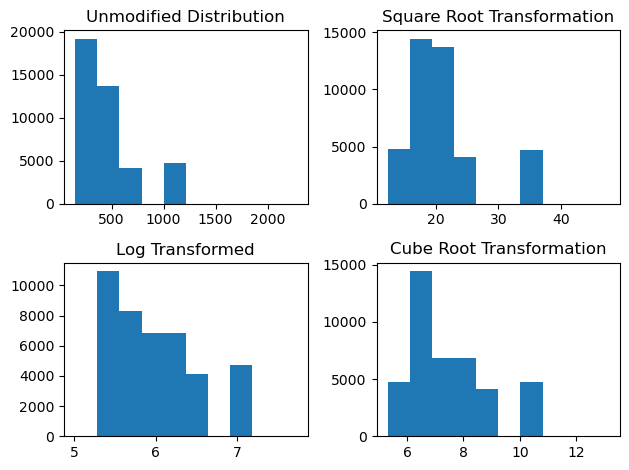

In [33]:
# View the distribution of margins in the outlier dataset 
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(outliers['margin'])
axs[0, 0].set_title("Unmodified Distribution")
axs[1, 0].hist(np.log(outliers['margin']))
axs[1, 0].set_title("Log Transformed")
axs[0, 1].hist(np.sqrt(outliers['margin']))
axs[0, 1].set_title("Square Root Transformation")
axs[1, 1].hist(np.cbrt(outliers['margin']))
axs[1, 1].set_title("Cube Root Transformation")
fig.tight_layout()

In [34]:
# create a dataframe of all observations not in the outliers data
df2 = df[~df.index.isin(outliers.index)]

df2.head()

,Order Date,Product,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
1,2019-01-28 14:15:00,Lightning Charging Cable,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,Wired Headphones,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,27in FHD Monitor,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,Wired Headphones,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
5,2019-01-29 20:22:00,AAA Batteries (4-pack),Alimentation,"775 Willow St, San Francisco, CA 94016",1,2.99,1.4950,2.99,1.4950


(array([9.8798e+04, 4.7320e+03, 1.3000e+02, 4.0740e+03, 3.6097e+04,
        0.0000e+00, 0.0000e+00, 2.8000e+01, 0.0000e+00, 2.8100e+02]),
 array([  1.495 ,  11.8455,  22.196 ,  32.5465,  42.897 ,  53.2475,
         63.598 ,  73.9485,  84.299 ,  94.6495, 105.    ]),
 <BarContainer object of 10 artists>)

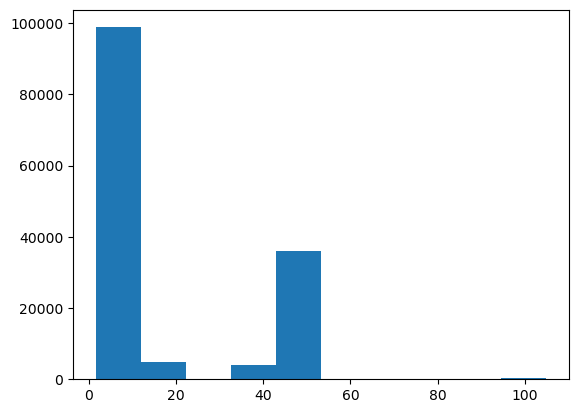

In [35]:
# plot the distribution of 'margin' of the original dataset with outliers removed
plt.hist(df2['margin'])

Without the outliers included in the dataset, 'margins' has a bimodal distribution.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd3e304be80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd3e304b8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd3e304b550>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd3b06935e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3b0693670>],
 'means': []}

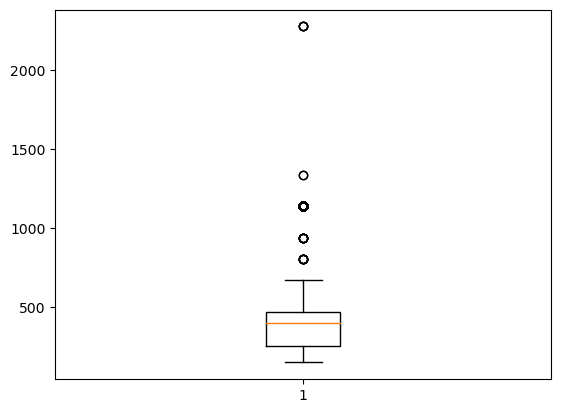

In [36]:
# check for outliers in outlier df
plt.boxplot(outliers['margin'])

In [37]:
# calculate outlier thresholds for the outlier df using IQR
upper2 = np.percentile(outliers['margin'], 75) + 1.5*stats.iqr(outliers['margin'])
lower2 = np.percentile(outliers['margin'], 25) - 1.5*stats.iqr(outliers['margin'])

print(upper2)
print(lower2)

790.61005
-67.01675


In [38]:
# create a new dataframe of outliers 
outliers2 = outliers[outliers['margin']>upper2]

outliers2.head()

,Order Date,Product,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
11,2019-01-31 10:12:00,Macbook Pro Laptop,Vêtements,"322 6th St, San Francisco, CA 94016",1,1700.0,561.0,1700.0,1139.0
55,2019-01-19 08:17:00,Macbook Pro Laptop,Sports,"789 Washington St, Los Angeles, CA 90001",1,1700.0,561.0,1700.0,1139.0
82,2019-01-13 23:51:00,Macbook Pro Laptop,Sports,"700 Jefferson St, New York City, NY 10001",1,1700.0,561.0,1700.0,1139.0
128,2019-01-17 21:00:00,Macbook Pro Laptop,Alimentation,"263 Meadow St, Los Angeles, CA 90001",1,1700.0,561.0,1700.0,1139.0
155,2019-01-10 12:59:00,Macbook Pro Laptop,Sports,"502 Walnut St, Atlanta, GA 30301",1,1700.0,561.0,1700.0,1139.0


In [39]:
# count the number of products sold in sales that were flagged as outliers 
outliers2_sold = outliers2['Product'].groupby(outliers2['Product']).count().sort_values(ascending=True)
outliers2_sold

Product
ThinkPad Laptop          2
Google Phone             7
iPhone                   7
Macbook Pro Laptop    4724
Name: Product, dtype: int64

In [40]:
#eliminate MacBooks from the original outlier list
outliers3 = outliers[~outliers.index.isin(outliers2.index)]

(array([ 4784.,     0., 14441.,     0.,  6849.,     0.,  6853.,    17.,
            0.,  4126.]),
 array([149.985  , 201.98583, 253.98666, 305.98749, 357.98832, 409.98915,
        461.98998, 513.99081, 565.99164, 617.99247, 669.9933 ]),
 <BarContainer object of 10 artists>)

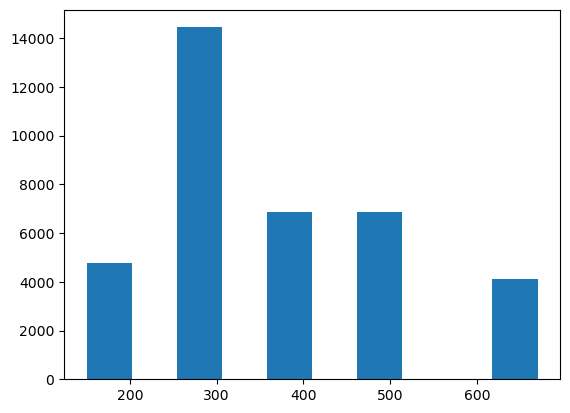

In [41]:
plt.hist((outliers3['margin']))

The distribution of 'margin' for the outlier df is almost normal after removing macbooks. This suggest that the original dataset should be divided into three datasets. 

## Create a Correlation Matrix 

In [42]:
df.corr()

ValueError: could not convert string to float: 'iPhone'

The extremely strong correlation between margin and price each, cost price, and turnover indicates that these features might be redundant. 

In [ ]:
outliers.corr()

In [ ]:
outliers2.corr()

Note the strong negative correlation between price and quantity ordered 

# Normalize the data with a scaler 

In [ ]:
# apply a min max scaler to the data to reduce the effect of variable value magnitude 
lma = np.asarray(log_margin).reshape(-1,1)

scaler = MinMaxScaler()
model=scaler.fit(lma)
scaled_data=model.transform(lma)

**MODEL**

In [43]:
outliers3.head()

,Order Date,Product,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,iPhone,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
6,2019-01-26 12:16:00,27in 4K Gaming Monitor,Vêtements,"979 Park St, Los Angeles, CA 90001",1,389.99,128.6967,389.99,261.2933
14,2019-01-03 21:54:00,Flatscreen TV,Électronique,"363 Spruce St, Austin, TX 73301",1,300.00,99.0000,300.00,201.0000
16,2019-01-10 11:20:00,Vareebadd Phone,Alimentation,"471 Center St, Los Angeles, CA 90001",1,400.00,132.0000,400.00,268.0000
22,2019-01-29 10:40:00,Google Phone,Électronique,"675 Washington St, Portland, OR 97035",1,600.00,198.0000,600.00,402.0000


In [44]:
outliers2.head()

,Order Date,Product,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
11,2019-01-31 10:12:00,Macbook Pro Laptop,Vêtements,"322 6th St, San Francisco, CA 94016",1,1700.0,561.0,1700.0,1139.0
55,2019-01-19 08:17:00,Macbook Pro Laptop,Sports,"789 Washington St, Los Angeles, CA 90001",1,1700.0,561.0,1700.0,1139.0
82,2019-01-13 23:51:00,Macbook Pro Laptop,Sports,"700 Jefferson St, New York City, NY 10001",1,1700.0,561.0,1700.0,1139.0
128,2019-01-17 21:00:00,Macbook Pro Laptop,Alimentation,"263 Meadow St, Los Angeles, CA 90001",1,1700.0,561.0,1700.0,1139.0
155,2019-01-10 12:59:00,Macbook Pro Laptop,Sports,"502 Walnut St, Atlanta, GA 30301",1,1700.0,561.0,1700.0,1139.0


In [47]:
outliers.head()

,Order Date,Product,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,iPhone,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
6,2019-01-26 12:16:00,27in 4K Gaming Monitor,Vêtements,"979 Park St, Los Angeles, CA 90001",1,389.99,128.6967,389.99,261.2933
11,2019-01-31 10:12:00,Macbook Pro Laptop,Vêtements,"322 6th St, San Francisco, CA 94016",1,1700.00,561.0000,1700.00,1139.0000
14,2019-01-03 21:54:00,Flatscreen TV,Électronique,"363 Spruce St, Austin, TX 73301",1,300.00,99.0000,300.00,201.0000
16,2019-01-10 11:20:00,Vareebadd Phone,Alimentation,"471 Center St, Los Angeles, CA 90001",1,400.00,132.0000,400.00,268.0000


In [182]:
df2.head()

,Order Date,Product,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
1,2019-01-28 14:15:00,Lightning Charging Cable,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,Wired Headphones,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,27in FHD Monitor,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,Wired Headphones,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
5,2019-01-29 20:22:00,AAA Batteries (4-pack),Alimentation,"775 Willow St, San Francisco, CA 94016",1,2.99,1.4950,2.99,1.4950


In [253]:
# Group the data frame by the 'product' column
grouped_df = df.groupby('Product')

# Create a dictionary to store the individual data frames
individual_dfs = {}

# Iterate over each group and store the corresponding data frame in the dictionary
for product, group in grouped_df:
    individual_dfs[product] = group

# Access the individual data frames using the product name as the key
individual_dfs['20in Monitor'].head()

,Order Date,Product,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
56,2019-01-28 11:17:00,20in Monitor,Alimentation,"534 Elm St, Atlanta, GA 30301",1,109.99,71.4935,109.99,38.4965
265,2019-01-18 09:23:00,20in Monitor,Vêtements,"331 Chestnut St, Dallas, TX 75001",1,109.99,71.4935,109.99,38.4965
319,2019-01-22 02:39:00,20in Monitor,Électronique,"390 Ridge St, Atlanta, GA 30301",1,109.99,71.4935,109.99,38.4965
374,2019-01-12 13:28:00,20in Monitor,Alimentation,"164 Pine St, Seattle, WA 98101",1,109.99,71.4935,109.99,38.4965
417,2019-01-30 11:12:00,20in Monitor,Électronique,"368 Forest St, San Francisco, CA 94016",1,109.99,71.4935,109.99,38.4965


In [254]:
# Shows the name of all the keys 
individual_dfs.keys()

dict_keys(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone', 'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable', 'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'iPhone'])

In [100]:
out = df2['Product'].groupby(df2['Product']).count().sort_values(ascending=True)
out


Product
20in Monitor                   4101
27in FHD Monitor               7507
Bose SoundSport Headphones    13323
Apple Airpods Headphones      15548
Wired Headphones              18882
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Lightning Charging Cable      21658
USB-C Charging Cable          21903
Name: Product, dtype: int64

In [188]:
productsMonitor_20_in_df = individual_dfs['20in Monitor']
aaa_battery_df = individual_dfs['AAA Batteries (4-pack)']


In [206]:
aaa_battery_df.head()

,Order Date,Product,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
5,2019-01-29 20:22:00,AAA Batteries (4-pack),Alimentation,"775 Willow St, San Francisco, CA 94016",1,2.99,1.495,2.99,1.495
12,2019-01-09 18:57:00,AAA Batteries (4-pack),Vêtements,"618 7th St, Los Angeles, CA 90001",3,2.99,1.495,8.97,4.485
20,2019-01-08 11:51:00,AAA Batteries (4-pack),Électronique,"238 Sunset St, Seattle, WA 98101",1,2.99,1.495,2.99,1.495
25,2019-01-20 17:26:00,AAA Batteries (4-pack),Alimentation,"920 Adams St, San Francisco, CA 94016",2,2.99,1.495,5.98,2.990
26,2019-01-01 22:00:00,AAA Batteries (4-pack),Alimentation,"293 Hill St, San Francisco, CA 94016",1,2.99,1.495,2.99,1.495


In [113]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [208]:
# Grouping the data by product and day, and calculating the sum of the 'margin' column
product_margin_aaa_battery = aaa_battery_df.groupby(['Product', aaa_battery_df['Order Date'].dt.date])['margin'].sum().reset_index()

In [210]:
product_margin_aaa_battery = product_margin_aaa_battery.drop(columns='Product')

In [211]:
product_margin_aaa_battery.dtypes

Order Date     object
margin        float64
dtype: object

In [212]:
# Covert 'Order Date' to datetime format
product_margin_aaa_battery['Order Date'] = pd.to_datetime(product_margin_aaa_battery['Order Date'])

In [213]:
product_margin_aaa_battery.dtypes

Order Date    datetime64[ns]
margin               float64
dtype: object

In [214]:
product_margin_aaa_battery.set_index('Order Date',inplace=True)

In [215]:
product_margin_aaa_battery.dtypes

margin    float64
dtype: object

In [216]:
product_margin_aaa_battery.head()

,margin
Order Date,
2019-01-01,91.195
2019-01-02,64.285
2019-01-03,59.800
2019-01-04,61.295
2019-01-05,94.185


In [219]:
product_margin_aaa_battery = product_margin_aaa_battery.dropna()

<AxesSubplot:xlabel='Order Date'>

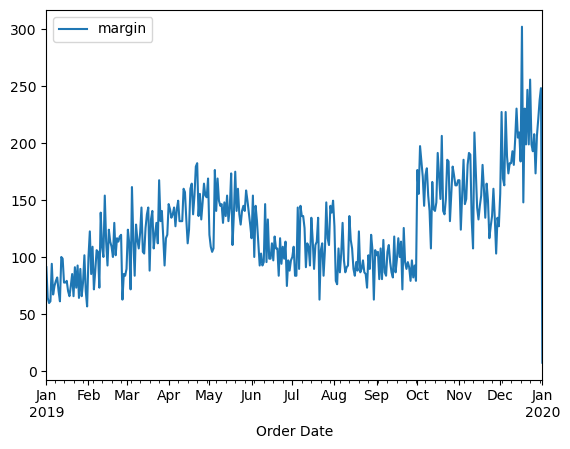

In [220]:
product_margin_aaa_battery.plot()

In [221]:
from statsmodels.tsa.stattools import adfuller
x=product_margin_aaa_battery['margin']
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")


ADF Stataics  -2.4839829641785407
p-value 0.11942023910357835
critical values 3279.9707899682053
Reject the null hypotheise , it mean data is not stationary


In [223]:
product_margin_aaa_battery['margin_1st_diff']=product_margin_aaa_battery['margin']-product_margin_aaa_battery['margin'].shift(1)

<AxesSubplot:xlabel='Order Date'>

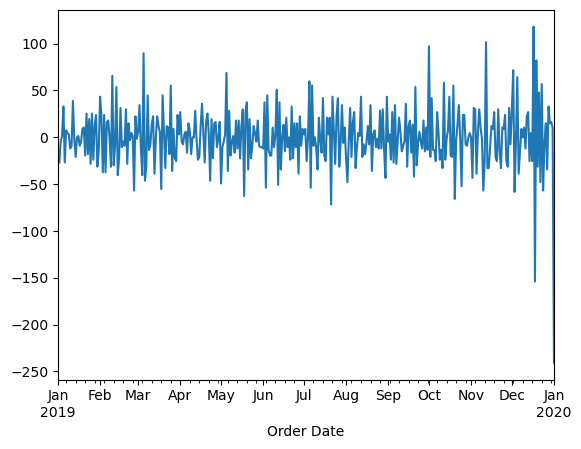

In [225]:
product_margin_aaa_battery['margin_1st_diff'].plot()

In [226]:
x=product_margin_aaa_battery['margin_1st_diff'].dropna() 
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -10.384427934341957
p-value 2.0979762341085157e-18
critical values 3275.377213277541
fail to reject null hypothese h1 , it mean data is stationary


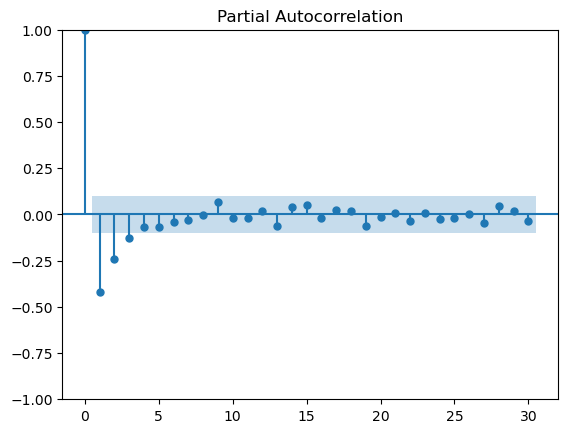

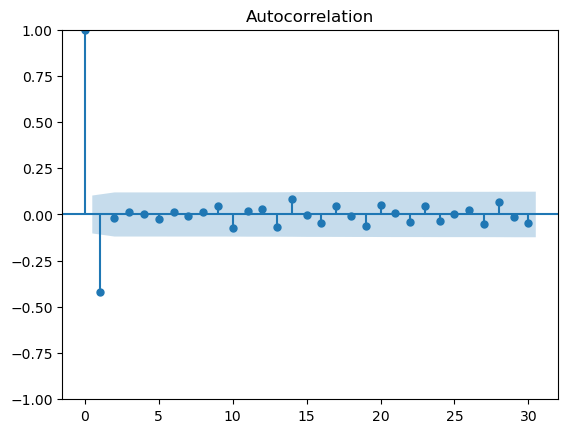

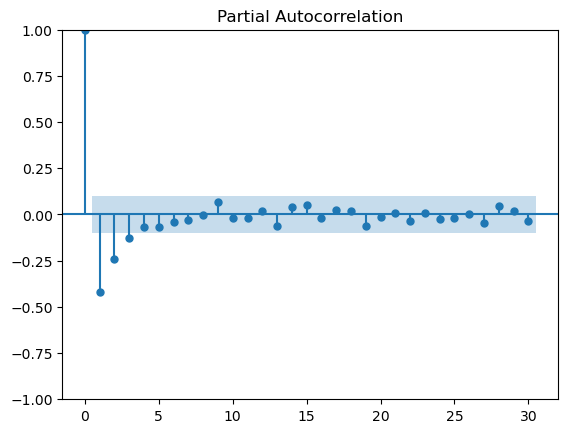

In [227]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(product_margin_aaa_battery['margin_1st_diff'].iloc[1:],lags=30)
plot_pacf(product_margin_aaa_battery['margin_1st_diff'].iloc[1:],lags=30)

/Users/feliperodriguez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/feliperodriguez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/feliperodriguez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Order Date'>

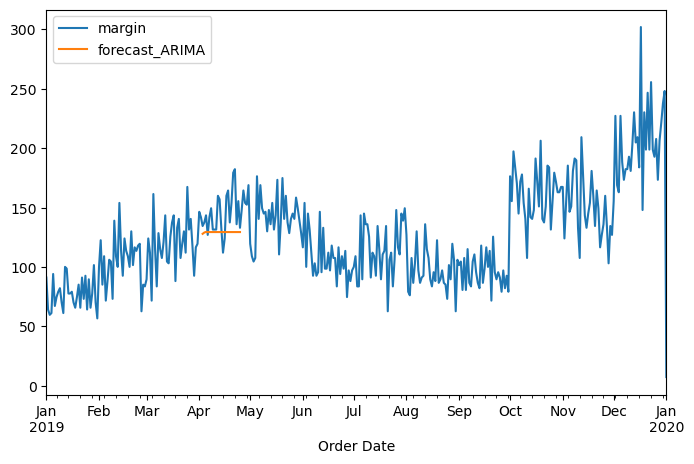

In [232]:
from statsmodels.tsa.arima.model import ARIMA
model1=ARIMA(product_margin_aaa_battery['margin'],order=(2,1,2))
model_fit1=model1.fit()
product_margin_aaa_battery['forecast_ARIMA'] = model_fit1.predict(start = 92, end= 114, dynamic= True)  
product_margin_aaa_battery[['margin', 'forecast_ARIMA']].plot(figsize=(8, 5))

/Users/feliperodriguez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/feliperodriguez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/feliperodriguez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Order Date'>

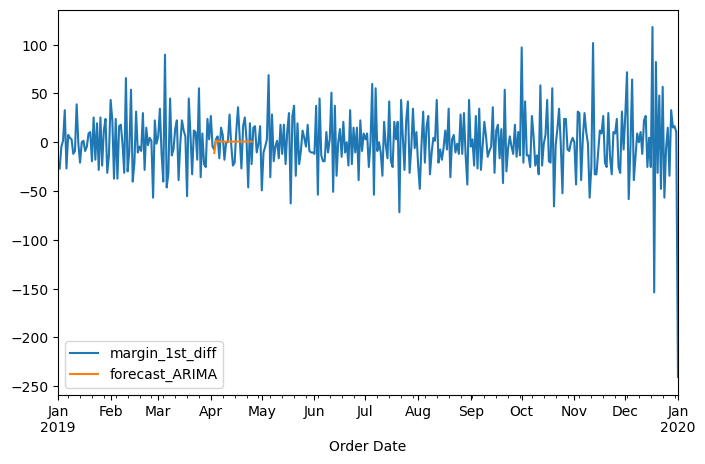

In [236]:
from statsmodels.tsa.arima.model import ARIMA
model1=ARIMA(product_margin_aaa_battery['margin_1st_diff'],order=(2,1,2))
model_fit1=model1.fit()
product_margin_aaa_battery['forecast_ARIMA'] = model_fit1.predict(start = 92, end= 114, dynamic= True)  
product_margin_aaa_battery[['margin_1st_diff', 'forecast_ARIMA']].plot(figsize=(8, 5))

In [234]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(product_margin_aaa_battery['margin'],order=(2,1,2),seasonal_order=(2,1,2,6))
result=model.fit()

/Users/feliperodriguez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/feliperodriguez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74283D+00    |proj g|=  5.98950D-02

At iterate    5    f=  4.70629D+00    |proj g|=  1.23421D-02

At iterate   10    f=  4.63150D+00    |proj g|=  4.38353D-02

At iterate   15    f=  4.62660D+00    |proj g|=  2.66815D-03

At iterate   20    f=  4.62605D+00    |proj g|=  3.44559D-04

At iterate   25    f=  4.62604D+00    |proj g|=  1.44939D-03

At iterate   30    f=  4.62592D+00    |proj g|=  1.85249D-03

At iterate   35    f=  4.62581D+00    |proj g|=  3.62273D-03

At iterate   40    f=  4.62576D+00    |proj g|=  2.21221D-03

At iterate   45    f=  4.62573D+00    |proj g|=  1.64432D-04

At iterate   50    f=  4.62573D+00    |proj g|=  5.94847D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/feliperodriguez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Order Date'>

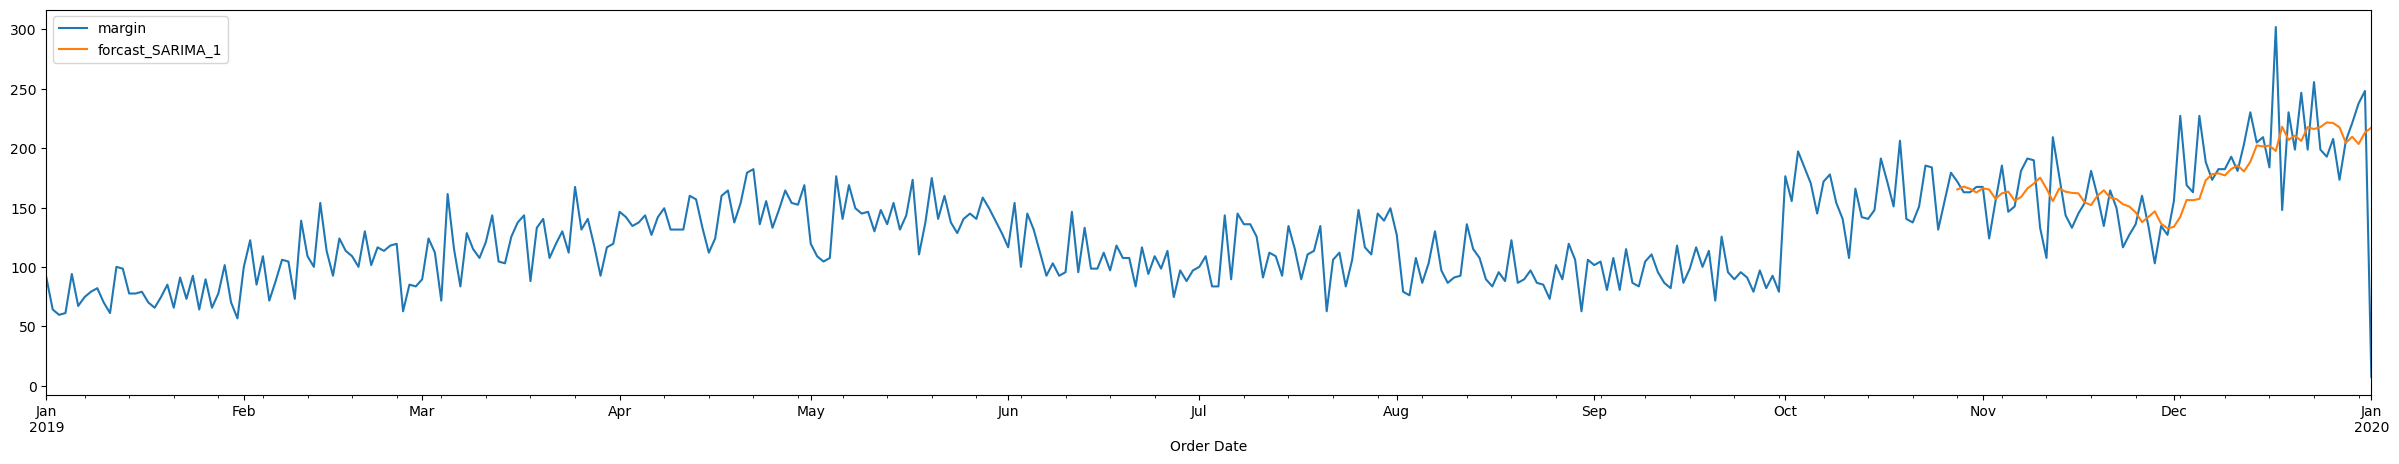

In [245]:
product_margin_aaa_battery['forcast_SARIMA_1']=result.predict(start=300, end=750)
product_margin_aaa_battery[['margin','forcast_SARIMA_1']].plot(figsize=(30, 5))

<AxesSubplot:xlabel='Order Date'>

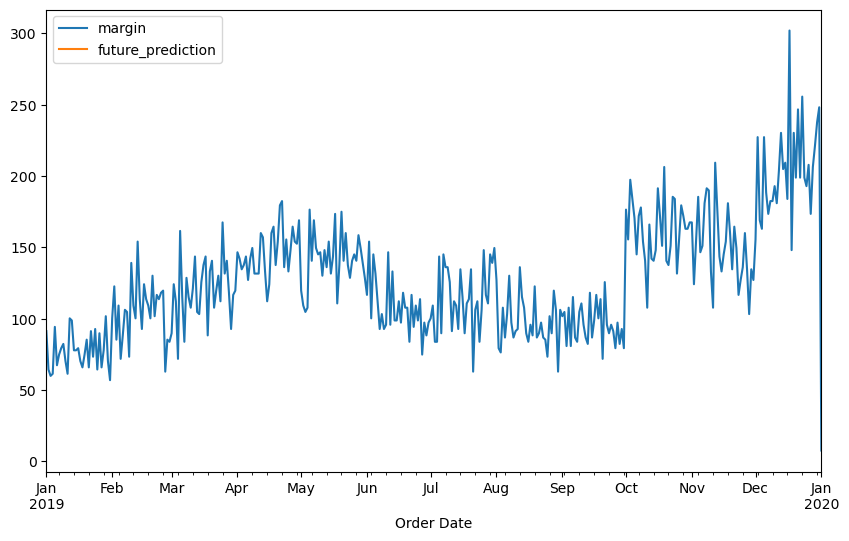

In [250]:
product_margin_aaa_battery['future_prediction'] = result.predict(start = 550, end=750)  
product_margin_aaa_battery[['margin', 'future_prediction']].plot(figsize=(10, 6))

In [164]:
train, test = train_test_split(product_margin_aaa_battery.margin.values)

In [165]:
model = pm.auto_arima(train, seasonal=False, m=52)
preds = model.predict(test.shape[0])
preds = model.predict(test.shape[0])

In [166]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

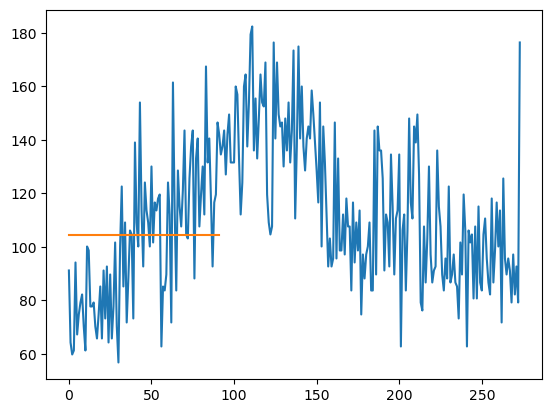

In [168]:
plt.plot(train)
plt.plot(preds)
plt.show()

In [150]:
product_margin_aaa_battery['Order Date'] = pd.to_datetime(product_margin_aaa_battery['Order Date'])

In [155]:
product_margin_aaa_battery.shape

(366, 2)

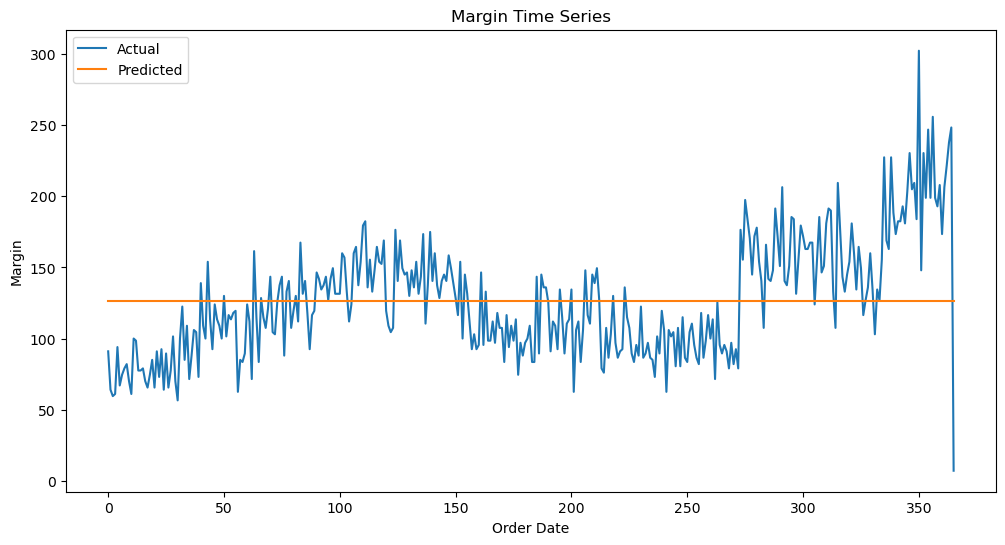

In [153]:
# Create a time series plot of the 'margin' column
product_margin_aaa_battery['margin'].plot(figsize=(12, 6))
plt.title('Margin Time Series')
plt.xlabel('Order Date')
plt.ylabel('Margin')

# Fit the ARIMA model
model = ARIMA(product_margin_aaa_battery['margin'])
model_fit = model.fit()

# Get the predicted values
predictions = model_fit.predict(start=product_margin_aaa_battery.index[0], end=product_margin_aaa_battery.index[-1])

# Plot the predictions
predictions.plot()
plt.legend(['Actual', 'Predicted'])
plt.show()

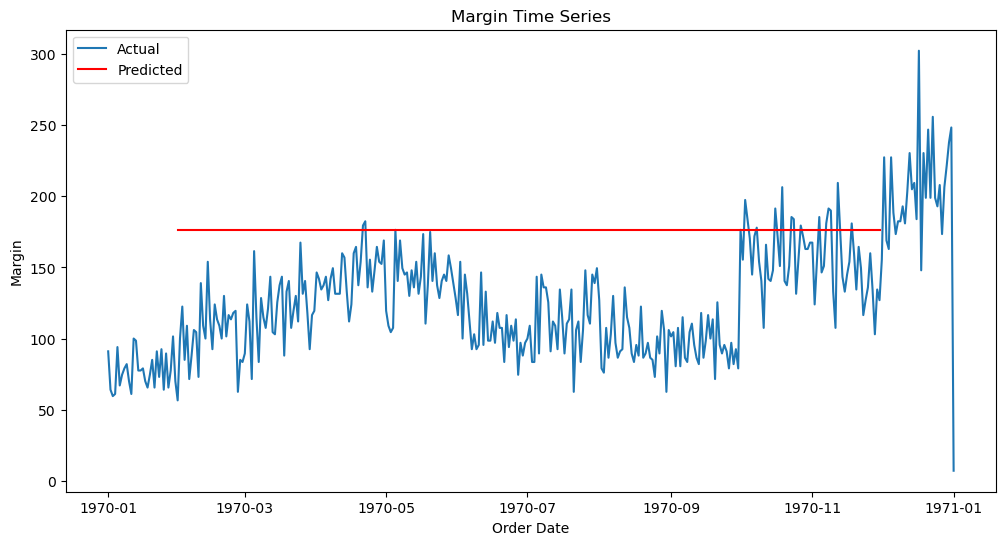

In [161]:
# Create a time series plot of the 'margin' column
product_margin_aaa_battery['margin'].plot(figsize=(12, 6))
plt.title('Margin Time Series')
plt.xlabel('Order Date')
plt.ylabel('Margin')

# Fit the ARIMA model
model = ARIMA(product_margin_aaa_battery['margin'], order=(1, 1, 1))
model_fit = model.fit()

# Generate future predictions
future_predictions = model_fit.predict(start=len(df), end=len(df)+10)

# Plot the future predictions
future_dates = pd.date_range(start=df.index[-1], periods=11, freq='M')
plt.plot(future_dates, future_predictions, color='r')
plt.legend(['Actual', 'Predicted'])
plt.show()